In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from pandas.core.common import SettingWithCopyWarning

from airQualFunctions import *
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
df = pd.read_csv("airquality_pm10_daily_summary.csv")

In [5]:
state = 'Washington'
StateData(df, state, state + 'Data')

WA = pd.read_csv(state + 'Data.csv')

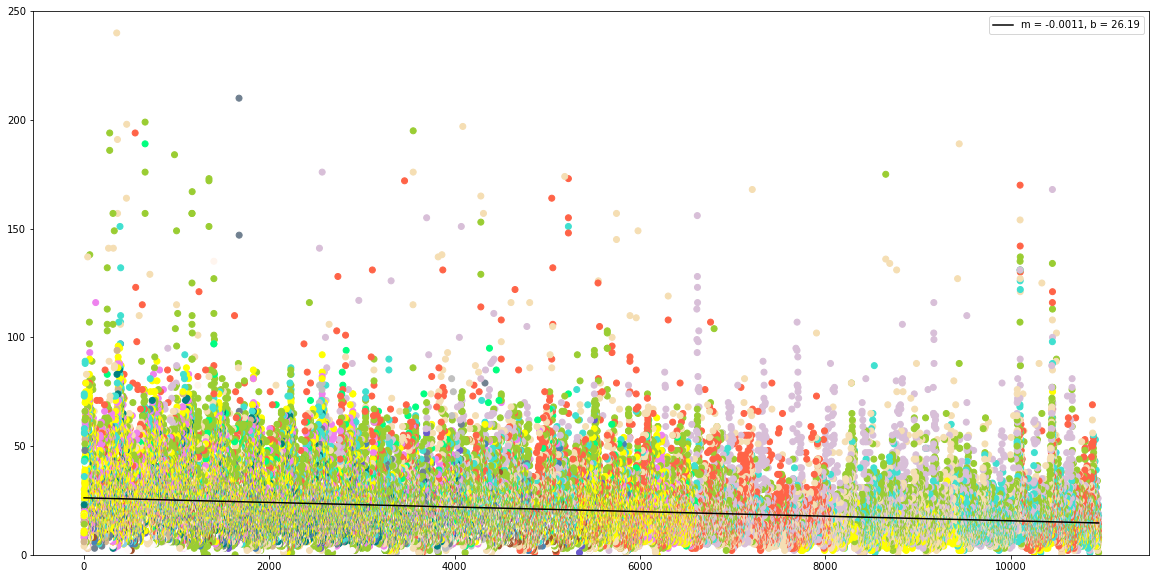

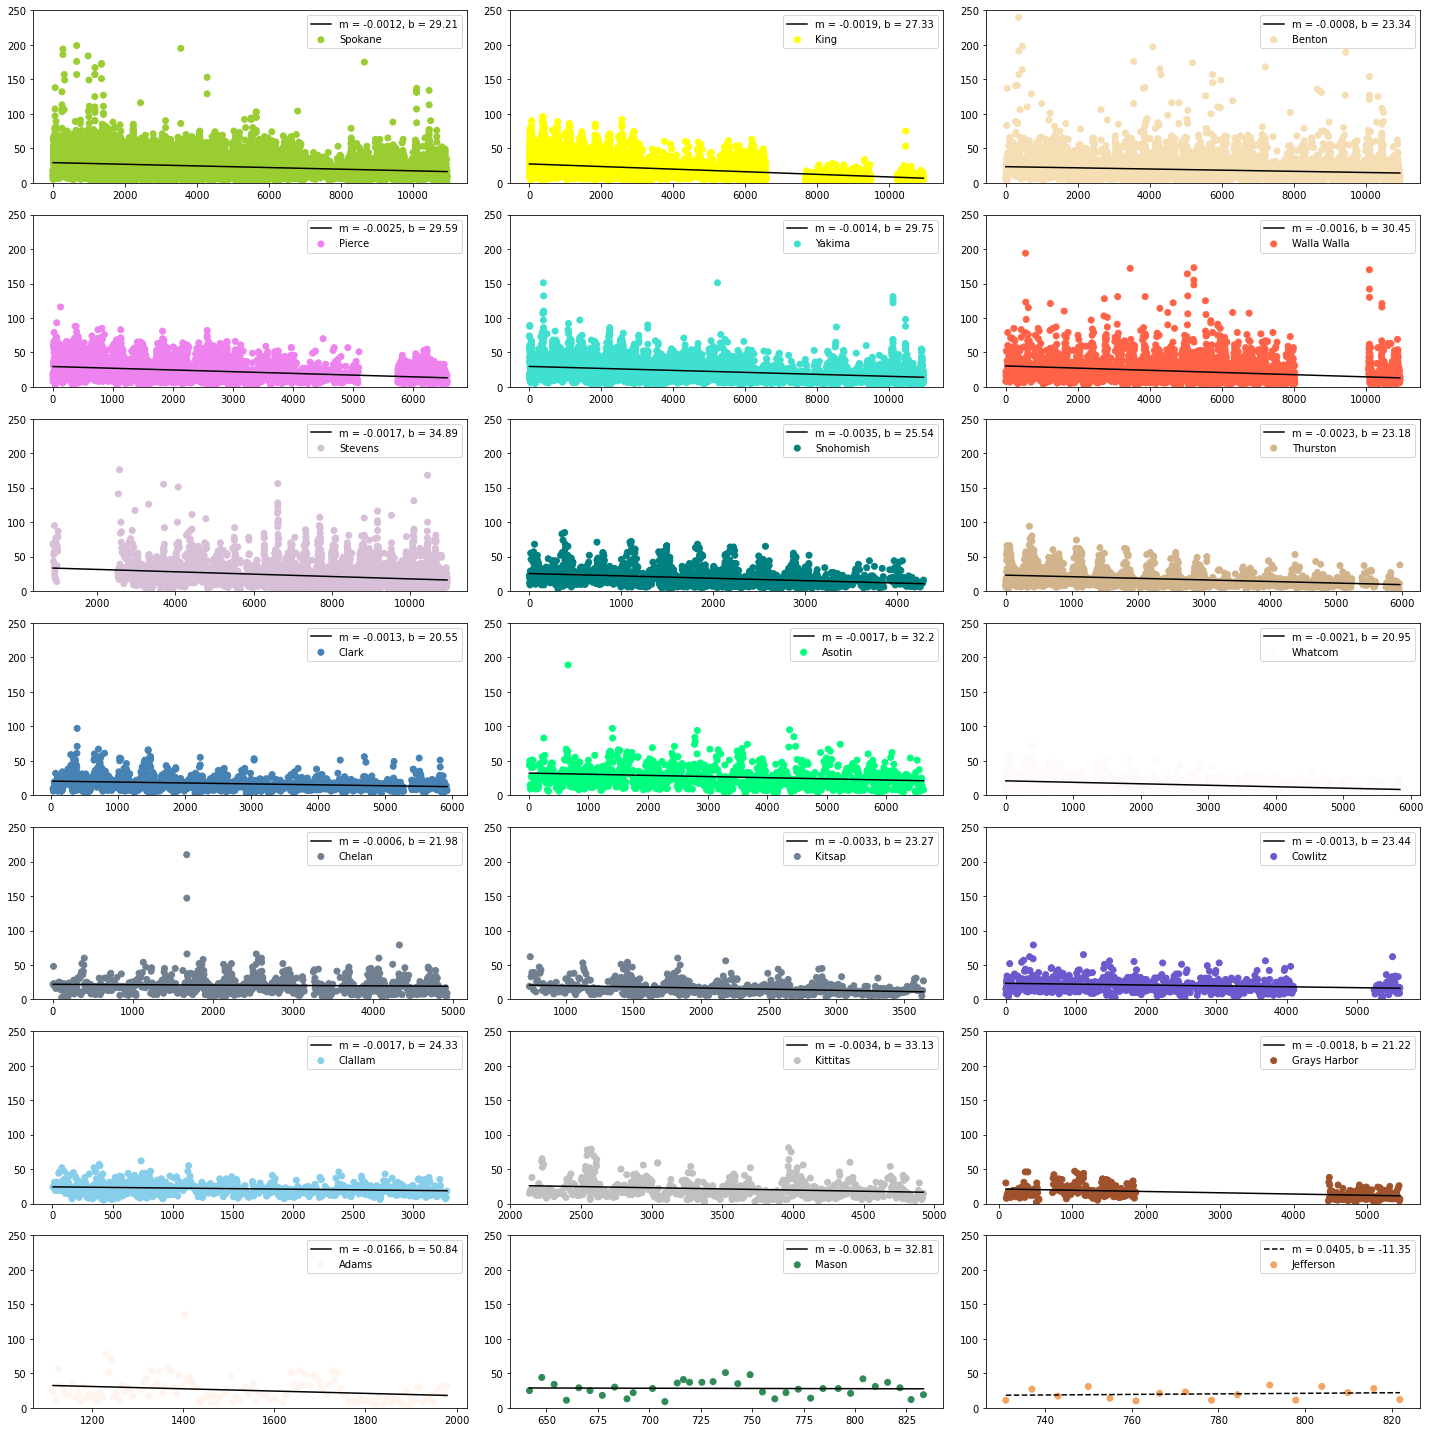

In [6]:
PlotByCounty(WA)

In [7]:
# according to https://www.airnow.gov/aqi/aqi-basics/#:~:text=Think%20of%20the%20AQI%20as,300%20represents%20hazardous%20air%20quality 
# an aqi value of 300+ is considered hazardous. we will explore the values higher than that here

WAhazard = WA.loc[WA['aqi'] > 300]
WAhazardNoInc = WAhazard.loc[WAhazard['event_type'] != 'Included']
WAhazardInc = WAhazard.loc[WAhazard['event_type'] == 'Included']

print(WAhazard.event_type.count(), WAhazardInc.event_type.count(), WAhazardNoInc.event_type.count())

15 13 2


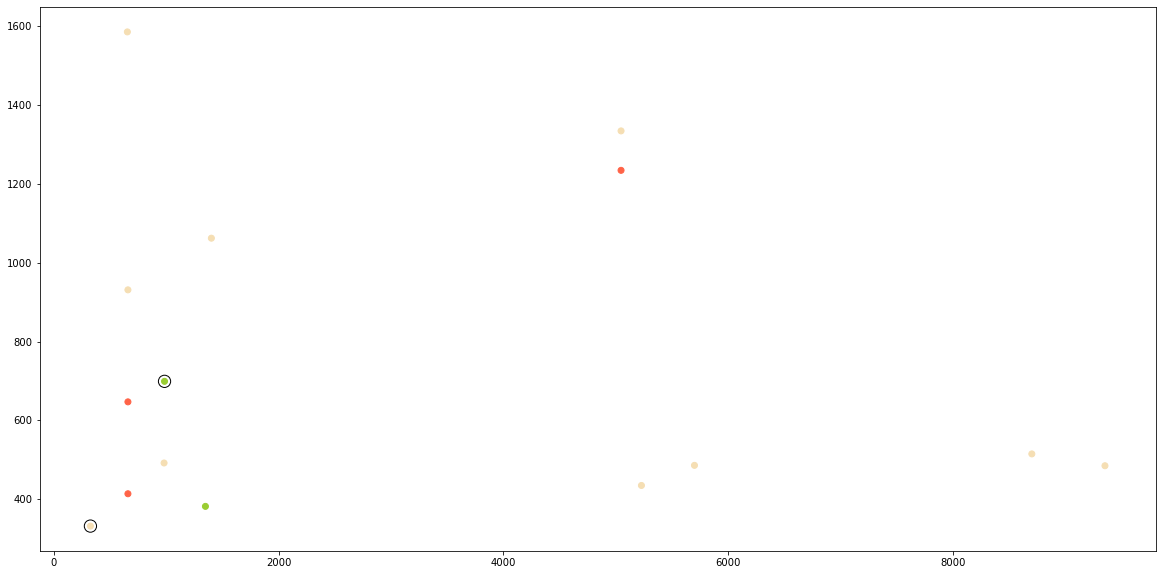

In [8]:
plt.figure(figsize = (20,10))
plt.scatter(WAhazard['days'], WAhazard['aqi'], c = WAhazard['colors'])
plt.scatter(WAhazardNoInc['days'], WAhazardNoInc['aqi'], s = 150, facecolors = 'none', edgecolors = 'k')

In [9]:
WAhazardNoInc.head()

,latitude,longitude,date_local,event_type,arithmetic_mean,aqi,state_name,county_name,days,colors
4202795,47.660743,-117.358121,1992-09-12,None,803.0,699,Washington,Spokane,985.333333,yellowgreen
4413029,46.227079,-119.223070,1990-11-22,None,450.0,332,Washington,Benton,326.166667,wheat


In [10]:
WAhazardInc.head(WAhazardInc.event_type.shape[0])

# interestingly, it seems most bad air quality spikes come in the month of october. why?

,latitude,longitude,date_local,event_type,arithmetic_mean,aqi,state_name,county_name,days,colors
746534,46.218350,-119.204153,2015-08-14,Included,589.0,485,Washington,Benton,9351.916667,wheat
1041433,46.218350,-119.204153,2013-11-02,Included,619.0,515,Washington,Benton,8701.166667,wheat
2304953,46.218350,-119.204153,2005-08-12,Included,590.0,486,Washington,Benton,5699.916667,wheat
2502342,46.218350,-119.204153,2004-04-27,Included,539.0,435,Washington,Benton,5228.250000,wheat
2576045,46.058810,-118.351470,2003-10-28,Included,1338.0,1234,Washington,Walla Walla,5046.750000,tomato
2576132,46.218350,-119.204153,2003-10-28,Included,1438.0,1334,Washington,Benton,5046.750000,wheat
4050188,46.227079,-119.223070,1993-11-03,Included,1166.0,1062,Washington,Benton,1402.166667,wheat
4070043,47.416450,-117.529970,1993-09-11,Included,490.0,382,Washington,Spokane,1349.333333,yellowgreen
4204609,46.227079,-119.223070,1992-09-08,Included,596.0,492,Washington,Benton,981.333333,wheat
4311675,46.058810,-118.351470,1991-10-21,Included,518.0,414,Washington,Walla Walla,659.750000,tomato
